# Project: Wrangling and Analyze Data

### Table of Contents

- <a href="#intro">Introduction</a>
- <a href="gather">Data Gathering</a>
- <a href="assess">Assessing Data</a>
- <a href="clean">Cleaning Data</a>
- <a href="store">Storing Data</a>
- <a href="analyze">Analyzing and Visualizing Data</a>

<a id="intro"></a>
## Introduction

In this project, Python and its libraries, will be utilized to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset for this project is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 9 million followers and has received international media coverage.

**Goal**: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

#### Packages
Import necessary packages for the project

In [998]:
import json
import tweepy
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id="gather"></a>
## Data Gathering
Gather **all** three pieces of data for this project and load them in the notebook. 

#### 1. WeRateDogs Twitter Archive Data (twitter_archive_enhanced.csv)

In [1000]:
#Load the Twitter Archive Data
twitter_archive = pd.read_csv('datasets/twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2. Tweet Image Prediction (image_predictions.tsv)

In [1001]:
#Download the Image Prediction Data using Request Package
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('datasets/image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [1002]:
image_predictions = pd.read_csv('datasets/image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Query additional data via the Twitter API (tweet_json.txt)

In [16]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_token_secret = 'Hidden'

# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  
# set access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth, wait_on_rate_limit=True)

In [31]:
# Get tweet status from Twitter API using the tweet_id from the Twitter archieve table
from timeit import default_timer as timer

count = 1
failed = {}
start = timer()
with open('datasets/tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id'].values:
        print(str(count) + ': ' + str(tweet_id))
        count += 1
        try:
            status = api.get_status(tweet_id, tweet_mode='extended')
            print('successful')
            file.write(json.dumps(status._json) + '\n')
        except tweepy.TweepyException as e:
            print('failed')
            failed[tweet_id] = e
            continue
stop = timer()

1: 892420643555336193
successful
2: 892177421306343426
successful
3: 891815181378084864
successful
4: 891689557279858688
successful
5: 891327558926688256
successful
6: 891087950875897856
successful
7: 890971913173991426
successful
8: 890729181411237888
successful
9: 890609185150312448
successful
10: 890240255349198849
successful
11: 890006608113172480
successful
12: 889880896479866881
successful
13: 889665388333682689
successful
14: 889638837579907072
successful
15: 889531135344209921
successful
16: 889278841981685760
successful
17: 888917238123831296
successful
18: 888804989199671297
successful
19: 888554962724278272
successful
20: 888202515573088257
failed
21: 888078434458587136
successful
22: 887705289381826560
successful
23: 887517139158093824
successful
24: 887473957103951883
successful
25: 887343217045368832
successful
26: 887101392804085760
successful
27: 886983233522544640
successful
28: 886736880519319552
successful
29: 886680336477933568
successful
30: 886366144734445568
succ

successful
240: 846874817362120707
successful
241: 846514051647705089
successful
242: 846505985330044928
successful
243: 846153765933735936
successful
244: 846139713627017216
successful
245: 846042936437604353
successful
246: 845812042753855489
successful
247: 845677943972139009
successful
248: 845459076796616705
failed
249: 845397057150107648
successful
250: 845306882940190720
successful
251: 845098359547420673
successful
252: 844979544864018432
successful
253: 844973813909606400
successful
254: 844704788403113984
failed
255: 844580511645339650
successful
256: 844223788422217728
successful
257: 843981021012017153
successful
258: 843856843873095681
successful
259: 843604394117681152
successful
260: 843235543001513987
successful
261: 842892208864923648
failed
262: 842846295480000512
successful
263: 842765311967449089
successful
264: 842535590457499648
successful
265: 842163532590374912
successful
266: 842115215311396866
successful
267: 841833993020538882
successful
268: 8416805850305413

successful
475: 816091915477250048
successful
476: 816062466425819140
successful
477: 816014286006976512
successful
478: 815990720817401858
successful
479: 815966073409433600
successful
480: 815745968457060357
successful
481: 815736392542261248
successful
482: 815639385530101762
successful
483: 815390420867969024
successful
484: 814986499976527872
successful
485: 814638523311648768
successful
486: 814578408554463233
successful
487: 814530161257443328
successful
488: 814153002265309185
successful
489: 813944609378369540
successful
490: 813910438903693312
successful
491: 813812741911748608
successful
492: 813800681631023104
successful
493: 813217897535406080
successful
494: 813202720496779264
successful
495: 813187593374461952
successful
496: 813172488309972993
successful
497: 813157409116065792
successful
498: 813142292504645637
successful
499: 813130366689148928
successful
500: 813127251579564032
successful
501: 813112105746448384
successful
502: 813096984823349248
successful
503: 8130

successful
710: 785170936622350336
successful
711: 784826020293709826
successful
712: 784517518371221505
successful
713: 784431430411685888
successful
714: 784183165795655680
successful
715: 784057939640352768
successful
716: 783839966405230592
successful
717: 783821107061198850
successful
718: 783695101801398276
successful
719: 783466772167098368
successful
720: 783391753726550016
successful
721: 783347506784731136
successful
722: 783334639985389568
successful
723: 783085703974514689
successful
724: 782969140009107456
successful
725: 782747134529531904
successful
726: 782722598790725632
successful
727: 782598640137187329
successful
728: 782305867769217024
successful
729: 782021823840026624
successful
730: 781955203444699136
successful
731: 781661882474196992
successful
732: 781655249211752448
successful
733: 781524693396357120
successful
734: 781308096455073793
successful
735: 781251288990355457
successful
736: 781163403222056960
successful
737: 780931614150983680
successful
738: 7808

Rate limit reached. Sleeping for: 287


successful
882: 760521673607086080
successful
883: 760290219849637889
successful
884: 760252756032651264
successful
885: 760190180481531904
successful
886: 760153949710192640
successful
887: 759943073749200896
successful
888: 759923798737051648
failed
889: 759846353224826880
successful
890: 759793422261743616
successful
891: 759566828574212096
failed
892: 759557299618865152
successful
893: 759447681597108224
successful
894: 759446261539934208
successful
895: 759197388317847553
successful
896: 759159934323924993
successful
897: 759099523532779520
successful
898: 759047813560868866
successful
899: 758854675097526272
successful
900: 758828659922702336
successful
901: 758740312047005698
successful
902: 758474966123810816
successful
903: 758467244762497024
successful
904: 758405701903519748
successful
905: 758355060040593408
successful
906: 758099635764359168
successful
907: 758041019896193024
successful
908: 757741869644341248
successful
909: 757729163776290825
successful
910: 757725642876

successful
1114: 733109485275860992
successful
1115: 732732193018155009
successful
1116: 732726085725589504
successful
1117: 732585889486888962
successful
1118: 732375214819057664
successful
1119: 732005617171337216
successful
1120: 731285275100512256
successful
1121: 731156023742988288
successful
1122: 730924654643314689
successful
1123: 730573383004487680
successful
1124: 730427201120833536
successful
1125: 730211855403241472
successful
1126: 730196704625098752
successful
1127: 729854734790754305
successful
1128: 729838605770891264
successful
1129: 729823566028484608
successful
1130: 729463711119904772
successful
1131: 729113531270991872
successful
1132: 728986383096946689
successful
1133: 728760639972315136
successful
1134: 728751179681943552
successful
1135: 728653952833728512
successful
1136: 728409960103686147
successful
1137: 728387165835677696
successful
1138: 728046963732717569
successful
1139: 728035342121635841
successful
1140: 728015554473250816
successful
1141: 72768567934

successful
1342: 704847917308362754
successful
1343: 704819833553219584
successful
1344: 704761120771465216
successful
1345: 704499785726889984
successful
1346: 704491224099647488
successful
1347: 704480331685040129
successful
1348: 704364645503647744
successful
1349: 704347321748819968
successful
1350: 704134088924532736
successful
1351: 704113298707505153
successful
1352: 704054845121142784
successful
1353: 703774238772166656
successful
1354: 703769065844768768
successful
1355: 703631701117943808
successful
1356: 703611486317502464
successful
1357: 703425003149250560
successful
1358: 703407252292673536
successful
1359: 703382836347330562
successful
1360: 703356393781329922
successful
1361: 703268521220972544
successful
1362: 703079050210877440
successful
1363: 703041949650034688
successful
1364: 702932127499816960
successful
1365: 702899151802126337
successful
1366: 702684942141153280
successful
1367: 702671118226825216
successful
1368: 702598099714314240
successful
1369: 70253951367

successful
1570: 687807801670897665
successful
1571: 687732144991551489
successful
1572: 687704180304273409
successful
1573: 687664829264453632
successful
1574: 687494652870668288
successful
1575: 687480748861947905
successful
1576: 687476254459715584
successful
1577: 687460506001633280
successful
1578: 687399393394311168
successful
1579: 687317306314240000
successful
1580: 687312378585812992
successful
1581: 687127927494963200
successful
1582: 687124485711986689
successful
1583: 687109925361856513
successful
1584: 687102708889812993
successful
1585: 687096057537363968
successful
1586: 686947101016735744
successful
1587: 686760001961103360
successful
1588: 686749460672679938
successful
1589: 686730991906516992
successful
1590: 686683045143953408
successful
1591: 686618349602762752
successful
1592: 686606069955735556
successful
1593: 686394059078897668
successful
1594: 686386521809772549
successful
1595: 686377065986265092
successful
1596: 686358356425093120
successful
1597: 68628677967

Rate limit reached. Sleeping for: 326


successful
1782: 677698403548192770
successful
1783: 677687604918272002
successful
1784: 677673981332312066
successful
1785: 677662372920729601
successful
1786: 677644091929329666
successful
1787: 677573743309385728
successful
1788: 677565715327688705
successful
1789: 677557565589463040
successful
1790: 677547928504967168
successful
1791: 677530072887205888
successful
1792: 677335745548390400
successful
1793: 677334615166730240
successful
1794: 677331501395156992
successful
1795: 677328882937298944
successful
1796: 677314812125323265
successful
1797: 677301033169788928
successful
1798: 677269281705472000
successful
1799: 677228873407442944
successful
1800: 677187300187611136
successful
1801: 676975532580409345
successful
1802: 676957860086095872
successful
1803: 676949632774234114
successful
1804: 676948236477857792
successful
1805: 676946864479084545
successful
1806: 676942428000112642
successful
1807: 676936541936185344
successful
1808: 676916996760600576
successful
1809: 67689753295

successful
2010: 672254177670729728
successful
2011: 672248013293752320
successful
2012: 672245253877968896
successful
2013: 672239279297454080
successful
2014: 672231046314901505
successful
2015: 672222792075620352
successful
2016: 672205392827572224
successful
2017: 672169685991993344
successful
2018: 672160042234327040
successful
2019: 672139350159835138
successful
2020: 672125275208069120
successful
2021: 672095186491711488
successful
2022: 672082170312290304
successful
2023: 672068090318987265
successful
2024: 671896809300709376
successful
2025: 671891728106971137
successful
2026: 671882082306625538
successful
2027: 671879137494245376
successful
2028: 671874878652489728
successful
2029: 671866342182637568
successful
2030: 671855973984772097
successful
2031: 671789708968640512
successful
2032: 671768281401958400
successful
2033: 671763349865160704
successful
2034: 671744970634719232
successful
2035: 671743150407421952
successful
2036: 671735591348891648
successful
2037: 67172990662

successful
2238: 668142349051129856
successful
2239: 668113020489474048
successful
2240: 667937095915278337
successful
2241: 667924896115245057
successful
2242: 667915453470232577
successful
2243: 667911425562669056
successful
2244: 667902449697558528
successful
2245: 667886921285246976
successful
2246: 667885044254572545
successful
2247: 667878741721415682
successful
2248: 667873844930215936
successful
2249: 667866724293877760
successful
2250: 667861340749471744
successful
2251: 667832474953625600
successful
2252: 667806454573760512
successful
2253: 667801013445750784
successful
2254: 667793409583771648
successful
2255: 667782464991965184
successful
2256: 667773195014021121
successful
2257: 667766675769573376
successful
2258: 667728196545200128
successful
2259: 667724302356258817
successful
2260: 667550904950915073
successful
2261: 667550882905632768
successful
2262: 667549055577362432
successful
2263: 667546741521195010
successful
2264: 667544320556335104
successful
2265: 66753889119

In [33]:
(stop - start) / 60

35.61672350416775

In [36]:
len(failed), failed

(31,
 {888202515573088257: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  877611172832227328: tweepy.errors.Forbidden('403 Forbidden\n179 - Sorry, you are not authorized to see this status.'),
  873697596434513921: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  872668790621863937: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  872261713294495745: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  869988702071779329: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  866816280283807744: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  861769973181624320: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  856602993587888130: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
  856330835276025856: tweepy.errors.NotFound('404 Not Found\n144 - No stat

Getting Data from Twitter API ran for about 37 minutes. While status for 31 tweets failed with mostly NotFound or Forbidden error.

In [628]:
tweet_list = []
with open('datasets/tweet_json.txt', 'r') as f:
    for line in f:
        data = json.loads(line)
        tweet_list.append({'tweet_id': data['id'], 
                           'retweet_count': data['retweet_count'], 
                           'like_count': data['favorite_count']})

In [629]:
tweet_counts = pd.DataFrame(tweet_list)
tweet_counts.head()

,tweet_id,retweet_count,like_count
0,892420643555336193,6877,32902
1,892177421306343426,5179,28436
2,891815181378084864,3422,21371
3,891689557279858688,7086,35867
4,891327558926688256,7598,34309


<a id="access"></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In addition to the following visual accessment, the datasets were also assessed visually using Microsoft Excel application.

In [284]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [40]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [42]:
tweet_counts

,tweet_id,retweet_count,like_count
0,892420643555336193,6877,32902
1,892177421306343426,5179,28436
2,891815181378084864,3422,21371
3,891689557279858688,7086,35867
4,891327558926688256,7598,34309
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


In [280]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [45]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2325 non-null   int64
 1   retweet_count  2325 non-null   int64
 2   like_count     2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [47]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [60]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [72]:
tweet_counts.describe()

,tweet_id,retweet_count,like_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2425.120430,6872.107957
std,6.814903e+16,4105.116201,10672.778508
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,487.000000,1196.000000
50%,7.177900e+17,1127.000000,2981.000000
75%,7.986285e+17,2805.000000,8400.000000
max,8.924206e+17,69406.000000,141709.000000


In [58]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [61]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [73]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [76]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [77]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [64]:
twitter_archive.duplicated().sum()

0

In [65]:
twitter_archive.tweet_id.duplicated().sum()

0

In [66]:
image_predictions.duplicated().sum()

0

In [71]:
image_predictions.tweet_id.duplicated().sum()

0

In [68]:
image_predictions.jpg_url.duplicated().sum()

66

### Quality issues

#### `twitter_archive` Table: 
1. Only original rating with images are needed but the table includes retweets and replies ratings.

2. The following columns: `in_reply_to_status_id`,  `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` are not needed for the analysis. 

3. `timestamp` column datatype is string instead of datetime.

4. The datatype for the `rating_numerator` and the `rating_denominator` is int instead of float.

5. Ratings with decimal points are presented wrongly e.g. 11.6/10 => 6/10 was recorded

6. Wrong rating for rows with multiple rating like text e.g. 24/7 ... 12/10 => 24/7 was recorded instead of 12/10

7. The `source` column contains html markup

#### `image_predictions` Table: 
8. Only interested in the highest confidence level `p1` that are dogs
9. Inconsistent captilization in the `p1` => `breed` column

### Tidiness issues
1. The `doggo`, `floofer`, `pupper`, `puppo` columns in the `twitter_archive` represent different dog stages and should be in a single column instead of in four different columns

2. The three tables should be combined into on table

<a id="clean"></a>
## Cleaning Data

### Quality Issues

In [744]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
predictions_clean = image_predictions.copy()
counts_clean = tweet_counts.copy()

### Issue #1: `twitter_archive`: Only original ratings with images are needed but the table includes retweets and replies ratings.

#### Define

Delete rows that are not original ratings.

#### Code

In [745]:
archive_clean.shape

(2356, 17)

In [746]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

archive_clean = archive_clean.dropna(subset='expanded_urls')

#### Test

In [747]:
archive_clean.shape

(2094, 17)

In [748]:
print(archive_clean.retweeted_status_id.notna().sum())
print(archive_clean.in_reply_to_status_id.notna().sum())
print(archive_clean.expanded_urls.isna().sum())

0
0
0


### Issue #2: `twitter_archive`: The following columns: in_reply_to_status_id,  in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are not needed for the analysis.

#### Define

Drop columns that are not needed for the analysis.

#### Code

In [749]:
archive_clean.drop(columns=['in_reply_to_status_id',  
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp', 
                    'expanded_urls'], inplace=True)

#### Test

In [750]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   rating_numerator    2094 non-null   int64 
 5   rating_denominator  2094 non-null   int64 
 6   name                2094 non-null   object
 7   doggo               2094 non-null   object
 8   floofer             2094 non-null   object
 9   pupper              2094 non-null   object
 10  puppo               2094 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.3+ KB


### Issue #3: `twitter_archive`: timestamp column datatype is string instead of datetime

#### Define

Fix the datatype of the `timestamp` column.

#### Code

In [751]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [752]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   rating_numerator    2094 non-null   int64              
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   doggo               2094 non-null   object             
 8   floofer             2094 non-null   object             
 9   pupper              2094 non-null   object             
 10  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.3+ KB


### Issue #4: `twitter_archive`: The datatype for the rating_numerator and the rating_denominator is int instead of float.

#### Define

Fix the datatype of the `rating_numerator` and the `rating_denominator` columns

#### Code

In [753]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

#### Test

In [754]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   rating_numerator    2094 non-null   float64            
 5   rating_denominator  2094 non-null   float64            
 6   name                2094 non-null   object             
 7   doggo               2094 non-null   object             
 8   floofer             2094 non-null   object             
 9   pupper              2094 non-null   object             
 10  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(7)
memory usage: 196.3+ KB


### Issue #5: `twitter_archive`: Ratings with decimal points are presented wrongly

#### Define

Identify and correct ratings with decimal points.

#### Code

In [755]:
# Function to set column width for a dataframe
def set_column_width(df, width=200):
    with pd.option_context('max_colwidth', width):
        display(df)

In [756]:
# Select rows with wrong rating_numerator
wrong_ratings = archive_clean[archive_clean.text.str.contains('\d+\.\d+/\d+')][['tweet_id', 'text']]


# Extract the correct rating_numerator
wrong_ratings['rating_numerator'] = wrong_ratings.text.str.extract('(\d+\.\d+)/\d+')


# Update the rating_numerator of affected rows
for tweet_id, numerator in zip(wrong_ratings.tweet_id, wrong_ratings.rating_numerator):
    archive_clean.loc[archive_clean.tweet_id == tweet_id, 'rating_numerator'] = numerator

#### Test

In [757]:
set_column_width(archive_clean[archive_clean.tweet_id.isin(wrong_ratings.tweet_id)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Issue #6: `twitter_archive`: Wrong rating for rows with multiple rating like text

#### Define

Correct rating for selected tweets

#### Code

In [759]:
# Select affected rows
multiple_ratings = archive_clean[(archive_clean.text.str.contains('\d+\/\d+.*?\d+\/\d+')) & (archive_clean.rating_denominator != 10)][['tweet_id', 'text']]

# Extract the correct ratings
multiple_ratings[['numerator', 'denominator']] = multiple_ratings.text.str.extract('\d+\/\d+.*?(\d+)\/(\d+)')

# Update the ratings
for tweet in multiple_ratings[['tweet_id', 'numerator', 'denominator']].values:
    archive_clean.loc[archive_clean.tweet_id == tweet[0], ['rating_numerator', 'rating_denominator']] = tweet[1], tweet[2]

#### Test

In [760]:
set_column_width(archive_clean[archive_clean.tweet_id.isin(multiple_ratings.tweet_id)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


### Issue #7: `twitter_archive`: The source column contains html markup

#### Define

Remove the html tags and attribute. Keep only the source text (content of the anchor tag)

#### Code

In [761]:
archive_clean['source'] = archive_clean.source.str.extract('>(.+)<')

#### Test

In [762]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #8: `image_predictions`: Only interested in the highest confidence level p1 that are dogs

#### Define

- Keep only rows that are dogs based on p1
- Drop unused columns
- Rename p1 to breed and p1_conf to confidence_level

#### Code

In [763]:
predictions_clean = predictions_clean[predictions_clean.p1_dog == True]

#### Test

In [764]:
(predictions_clean.p1_dog == False).sum()

0

#### Code

In [765]:
predictions_clean.drop(columns=['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [766]:
predictions_clean.rename({'p1': 'breed', 'p1_conf': 'confidence_level'}, axis='columns', inplace=True)

#### Test

In [767]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1532 non-null   int64  
 1   jpg_url           1532 non-null   object 
 2   img_num           1532 non-null   int64  
 3   breed             1532 non-null   object 
 4   confidence_level  1532 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 71.8+ KB


### Issue #9: `image_predictions`: Inconsistent captilization in the breed column

#### Define

Capitalize `breed` column

#### Code

In [768]:
predictions_clean['breed'] = predictions_clean.breed.str.capitalize()

#### Test

In [769]:
predictions_clean

,tweet_id,jpg_url,img_num,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311
...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012


### Tidiness issues

### Issue #1: `twitter_archive`: The doggo, floofer, pupper, puppo columns in the twitter_archive represent different dog stages and should be in a single column instead of in four different columns

#### Define

Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns in single column

#### Code

In [770]:
archive_clean = pd.melt(archive_clean, 
            id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
            value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='type', value_name='stage')

archive_clean.drop('type', axis='columns', inplace=True)

archive_clean = archive_clean.sort_values('stage', ascending=False).drop_duplicates(subset='tweet_id')

In [772]:
archive_clean['rating_numerator'] = archive_clean.rating_numerator.astype('float')
archive_clean['rating_denominator'] = archive_clean.rating_denominator.astype('float')

#### Test

In [771]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 6606 to 6325
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   rating_numerator    2094 non-null   object             
 5   rating_denominator  2094 non-null   object             
 6   name                2094 non-null   object             
 7   stage               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 147.2+ KB


### Issue #2: `twitter_archive`: The three tables should be combined into on table

#### Define

Merge the `twitter_archive`, `image_predictions` and `tweet_counts` tables into one table.

#### Code

In [795]:
twitter_archive_clean = archive_clean.merge(counts_clean, on='tweet_id')
twitter_archive_clean = twitter_archive_clean.merge(predictions_clean, on='tweet_id')

#### Test

In [796]:
twitter_archive_clean.shape

(1455, 14)

In [797]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,like_count,jpg_url,img_num,breed,confidence_level
0,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,39134,120617,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015
1,867421006826221569,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,12.0,10.0,Shikha,puppo,2085,13910,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457
2,878776093423087618,2017-06-25 00:45:22+00:00,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,13.0,10.0,Snoopy,puppo,3369,16595,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684
3,743253157753532416,2016-06-16 01:25:36+00:00,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,puppo,1102,3831,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,Malamute,0.442612
4,874012996292530176,2017-06-11 21:18:31+00:00,Twitter for iPhone,This is Sebastian. He can't see all the colors...,13.0,10.0,Sebastian,puppo,8422,29236,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674


In [798]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1455 non-null   int64              
 1   timestamp           1455 non-null   datetime64[ns, UTC]
 2   source              1455 non-null   object             
 3   text                1455 non-null   object             
 4   rating_numerator    1455 non-null   float64            
 5   rating_denominator  1455 non-null   float64            
 6   name                1455 non-null   object             
 7   stage               1455 non-null   object             
 8   retweet_count       1455 non-null   int64              
 9   like_count          1455 non-null   int64              
 10  jpg_url             1455 non-null   object             
 11  img_num             1455 non-null   int64              
 12  breed               1455 non-null 

<a id="store"></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [814]:
twitter_archive_clean.to_csv('datasets/twitter_archive_master.csv', index=False)

<a id="analyze"></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1007]:
twitter_archive_master = pd.read_csv('datasets/twitter_archive_master.csv', parse_dates=['timestamp'])

In [1008]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,like_count,jpg_url,img_num,breed,confidence_level
0,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,39134,120617,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015
1,867421006826221569,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,12.0,10.0,Shikha,puppo,2085,13910,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457
2,878776093423087618,2017-06-25 00:45:22+00:00,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,13.0,10.0,Snoopy,puppo,3369,16595,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684
3,743253157753532416,2016-06-16 01:25:36+00:00,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,puppo,1102,3831,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,Malamute,0.442612
4,874012996292530176,2017-06-11 21:18:31+00:00,Twitter for iPhone,This is Sebastian. He can't see all the colors...,13.0,10.0,Sebastian,puppo,8422,29236,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674


In [823]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1455 non-null   int64              
 1   timestamp           1455 non-null   datetime64[ns, UTC]
 2   source              1455 non-null   object             
 3   text                1455 non-null   object             
 4   rating_numerator    1455 non-null   float64            
 5   rating_denominator  1455 non-null   float64            
 6   name                1455 non-null   object             
 7   stage               1455 non-null   object             
 8   retweet_count       1455 non-null   int64              
 9   like_count          1455 non-null   int64              
 10  jpg_url             1455 non-null   object             
 11  img_num             1455 non-null   int64              
 12  breed               1455 non-null 

### Insights:
1. Average Number of Dog Ratings Per Day

2. The Top 15 most popular dog breed

3. The most used platform for tweeting dog ratings

#### 1. Average Number of Dog Ratings Per Day

In [841]:
twitter_archive_by_date = twitter_archive_master.timestamp.dt.date

In [847]:
number_of_daily_ratings = twitter_archive_master.groupby(twitter_archive_by_date).tweet_id.count()

In [851]:
average_daily_ratings = number_of_daily_ratings.mean();

In [938]:
average_daily_ratings

2.5982142857142856

### Visualizations

In [987]:
x_mean = np.array([average_daily_ratings] * 6)
y_mean = np.arange(0, 300, 50)

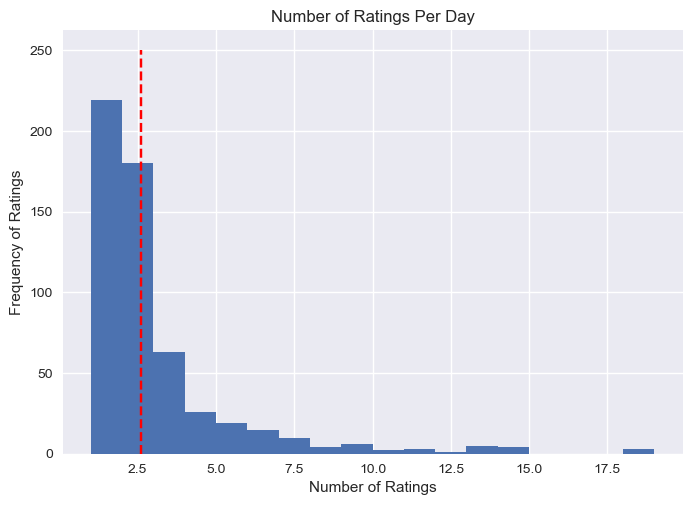

In [1006]:
plt.style.use('seaborn')
bins = np.arange(1, max(number_of_daily_ratings) + 1)
plt.hist(number_of_daily_ratings, bins=bins);
plt.plot(x_mean, y_mean,  color='red', linestyle='--')
plt.title('Number of Ratings Per Day')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency of Ratings');
plt.savefig('images/Number of Daily Rating.png');

#### 2. Top 10 Most Popular Dog Breeds

In [888]:
dog_breeds = twitter_archive_master.breed.value_counts()

In [992]:
dog_breeds.sum()

1455

In [991]:
twitter_archive_master.breed.value_counts(normalize=True).nlargest(15).sum()

0.51340206185567

In [935]:
dog_breeds.head(15)

Golden_retriever            137
Labrador_retriever           91
Pembroke                     88
Chihuahua                    78
Pug                          54
Chow                         41
Samoyed                      39
Pomeranian                   38
Toy_poodle                   36
Malamute                     29
Cocker_spaniel               27
French_bulldog               25
Chesapeake_bay_retriever     23
Miniature_pinscher           21
German_shepherd              20
Name: breed, dtype: int64

In [936]:
top_10_breeds = dog_breeds.nlargest(15).sort_values()

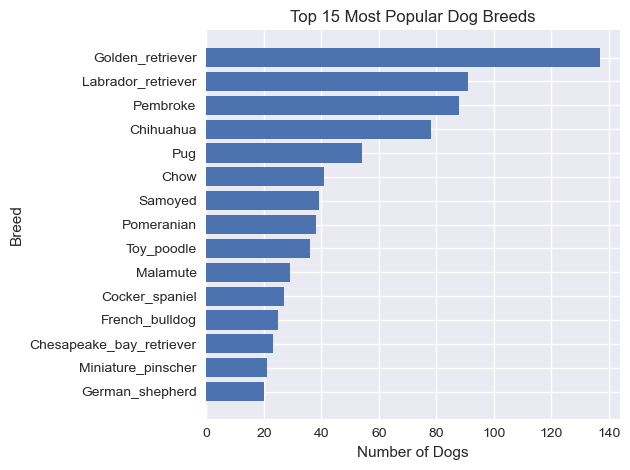

In [1005]:
plt.barh(top_10_breeds.index, top_10_breeds);
plt.rcParams['figure.figsize'] = [6.4, 4.8]
plt.title('Top 15 Most Popular Dog Breeds')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed');
plt.tight_layout()
plt.savefig('images/Most Popular Dog Breeds.png');

#### 3. Platforms Used for Tweeting Dog Ratings

In [904]:
sources = twitter_archive_master.groupby('source').tweet_id.count()

In [997]:
round(twitter_archive_master.source.value_counts(normalize=True), 3)

Twitter for iPhone    0.983
Twitter Web Client    0.013
TweetDeck             0.004
Name: source, dtype: float64

In [942]:
sources = twitter_archive_master.source.value_counts()

In [943]:
sources

Twitter for iPhone    1430
Twitter Web Client      19
TweetDeck                6
Name: source, dtype: int64

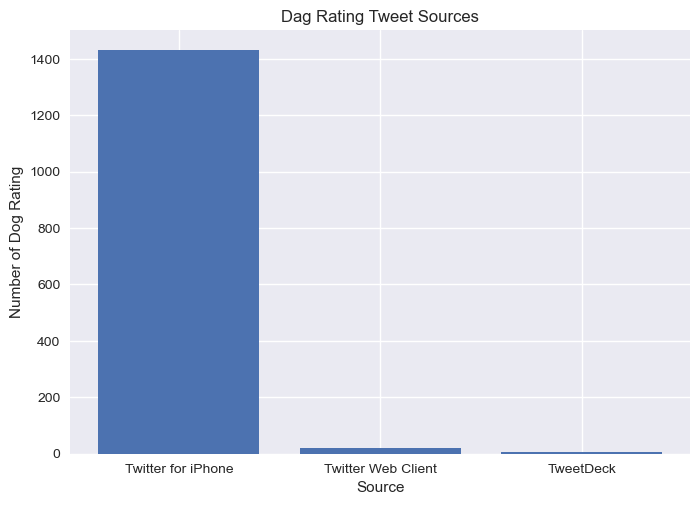

In [1003]:
plt.bar(sources.index, sources);
plt.title('Dag Rating Tweet Sources')
plt.xlabel('Source')
plt.ylabel('Number of Dog Rating')
plt.savefig('images/Tweet Sources.png');